***Author : Roshan Gowda***

***Task 1 :Prediction using Supervised ML***

#1.Importing relevent libraries





In [21]:
import numpy as np                        
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
print("you're good to go!!")

you're good to go!!


#2.reading the csv data from the link provided

In [22]:
data_link='http://bit.ly/w-data'         #that is the link where our data is
my_data=pd.read_csv(data_link)           #reads the csv data file
print('data imported successfully')

data imported successfully


#3.exploring the data



In [23]:
my_data.head() #let's take a peek of how our data looks!

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [24]:
my_data.info() #gives information of no.of rows and columns , null or missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#4.visualize the data 

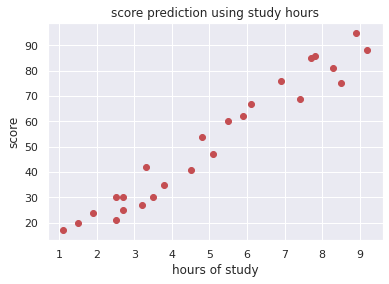

In [25]:
plt.scatter(my_data['Hours'],my_data['Scores'],c='r') #lets do a scatter plot
plt.title("score prediction using study hours")       #gives the title to the chart
plt.xlabel('hours of study')                          #gives the title to x-axis
plt.ylabel('score')                                   #gives the title to y-axis
plt.show()                                            #prints the plotted graph

#5.Preparing the data for prediction(separating input and output values)

In [26]:
x = my_data.iloc[:, :-1].values  #x stores the independent variable i.e., no.of hours
y = my_data.iloc[:, 1].values    #y stores the dependent variable i.e., score

#6.spilting the data into test and training sets

In [27]:
from sklearn.model_selection import train_test_split # it's essential to spilt your data into train and test for more accurate predictions
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=6)
print("data split into training and test data successfully")

data split into training and test data successfully


#7.choosing the linear regression model and training the model with the training data set

In [28]:
from sklearn.linear_model import LinearRegression
my_model=LinearRegression()                          #choosing linear regressor as our model
my_model.fit(train_x,train_y)                        #let's train the model by providing the training data
print('training complete')

training complete


#8.plotting the regression line


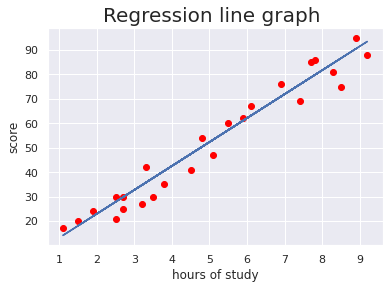

In [29]:
rline=my_model.coef_*x+my_model.intercept_           #linear regression line formula 
plt.scatter(x,y,c='red')                             #it's good to have the earlier plotted scatter graph in place
plt.title('Regression line graph ',fontsize='20')    #gives the title to the chart
plt.xlabel('hours of study')                         
plt.ylabel('score')
plt.plot(x,rline)                                    #adds the linear regression line on top of the scatter plot
plt.show()

# 9.making prediction using the testing data set

In [30]:
my_prediction=my_model.predict(test_x)                    #we're set to make our predictions
result=pd.DataFrame({'my_predictions':my_prediction})     #converts the predicted array into a pandas data frame
result

,my_predictions
0,40.599597
1,57.243804
2,18.080965
3,93.469429
4,84.657790
5,34.725172
6,27.871675


#10.Model Validation

comparing actual values to the predicted values

In [31]:
compare=pd.DataFrame({'Actaul values':test_y,'Predicted values':my_prediction}) #let us look how good our model performed by comparing
compare   

,Actaul values,Predicted values
0,35,40.599597
1,60,57.243804
2,20,18.080965
3,88,93.469429
4,81,84.657790
5,27,34.725172
6,21,27.871675


calcualte the mean absolute error and the accuracy of the model

In [32]:
from sklearn import metrics                                                     #now validating the model score and the model accuracy
score=metrics.r2_score(test_y,my_prediction)
error=metrics.mean_absolute_error(test_y,my_prediction)
print('{:.2f}% is the accuracy score of the model\n{:.3f} is the mean absolute error'.format((score*100),error))

96.11% is the accuracy score of the model
4.857 is the mean absolute error
